# 4.9 Intro to Visualizations in Python

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# establishing a path
path = r'C:\Users\supri\Desktop\Supriya\DataAnalysis\Project\Data Immersion\Achievement 1-2\Instacart_Basket_Analysis'

In [3]:
# importing dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merged_derived_new_variables_aggregated.pkl'))

### Creating a Bar Chart

<Axes: xlabel='orders_days_of_week'>

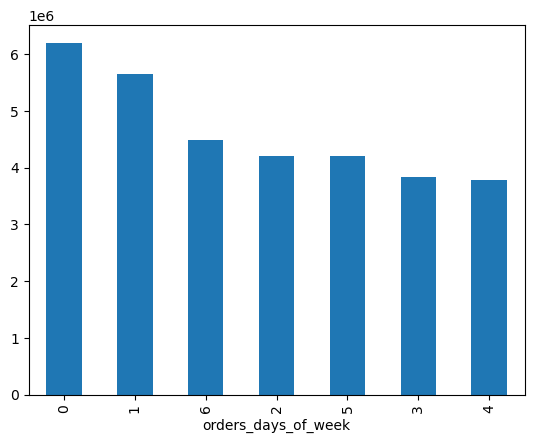

In [4]:
#Plotting a bar chart
df['orders_days_of_week'].value_counts().plot.bar()

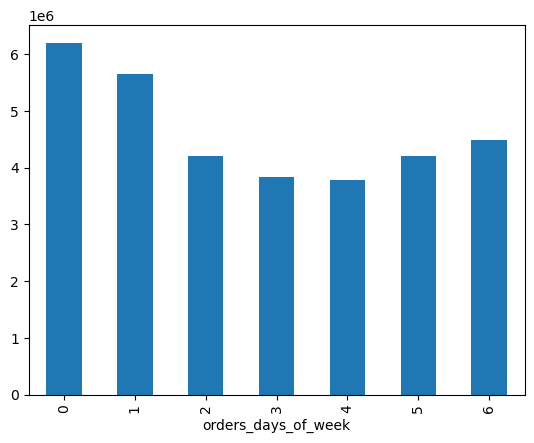

In [5]:
#Indexing by order of days of week
bar = df['orders_days_of_week'].value_counts().sort_index().plot.bar()

In [6]:
#Indexing sort_index() can also be used to sort frequencies like without indexing
df['orders_days_of_week'].value_counts()

orders_days_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [7]:
#Indexing sort_index() can also be used to sort frequencies like - with indexing
df['orders_days_of_week'].value_counts().sort_index()

orders_days_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

In [8]:
#Saving image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

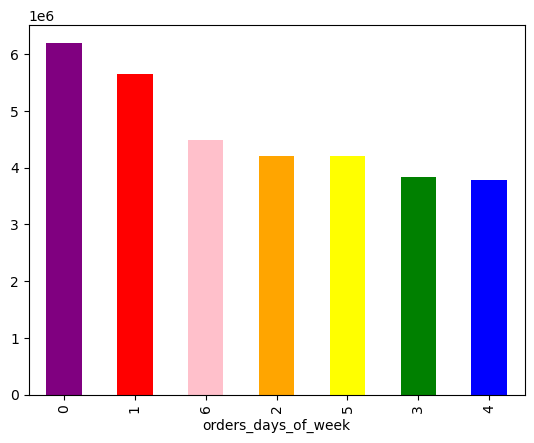

In [9]:
#Try adding colour
bar = df['orders_days_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [10]:
#Saving image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_color.png'))

### Histograms and Scatterplots

<Axes: ylabel='Frequency'>

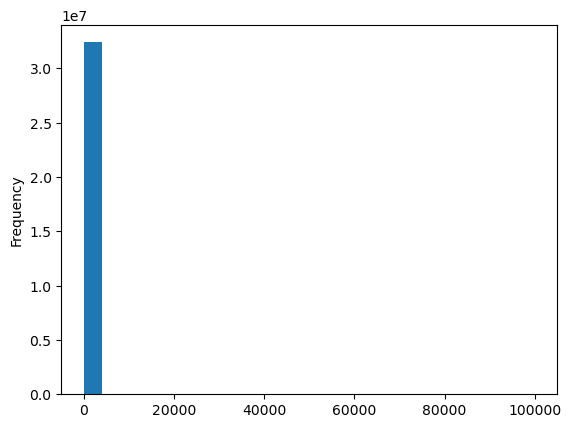

In [11]:
#Creating histogram
#smaller number of bins equates to denser bars, 
#while a larger number of bins equates to sparser bars
df['prices'].plot.hist(bins = 25)

In [12]:
#Descriptive statistics for prices column
df['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [13]:
#Checking the mean for prices column
df['prices'].mean()

11.980225638383445

In [14]:
#Checking the median for prices column
df['prices'].median()

7.4

In [15]:
#Checking the max for prices column
df['prices'].max()

99999.0

####Observation -While the mean and median are between 7 and 12 (relatively realistic), the max value yields a strange result. must be the result of data corruption or some kind of special value within the data.This is breaking the histogram and showing only 1 big column and second bar is very tiny cant be seen.

<Axes: xlabel='prices', ylabel='prices'>

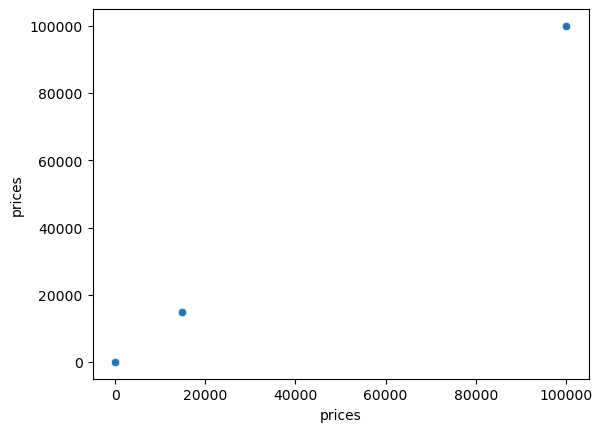

In [16]:
#Creating Scatterplot - using prices column against itself to find outliers
sns.scatterplot(x = 'prices', y = 'prices',data = df)

####ObservationThe mean of the column is around 12, so you’d expect the data points to be distributed somewhere around this number. However, there are two data points far, far beyond values you’d ever expect—values close to 20,000 and even 100,000.

In [17]:
#Checking for outliers - like price above $100
df.loc[df['prices'] > 100]

,Unnamed: 0.1,order_id,user_id,eval_set,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,first_time_customers,product_id,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,customer_frequency,frequency_flag
1576,171,912404,17,prior,12,2,14,5.0,False,21553,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High_spender,5.0,Frequent customer
1638,181,603376,17,prior,22,6,16,4.0,False,21553,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High_spender,5.0,Frequent customer
16522,1944,3264360,135,prior,2,2,21,13.0,False,21553,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High_spender,12.0,Regular customer
16528,1945,892534,135,prior,3,0,8,12.0,False,21553,...,High-range product,Busiest Day,Busiest Days,Average orders,4,New customer,1154.792308,High_spender,12.0,Regular customer
53672,5708,229704,342,prior,8,1,19,30.0,False,21553,...,High-range product,Regularly busy,Busiest Days,Average orders,16,Regular customer,114.426619,High_spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3411856,3172853,205650,prior,18,1,9,7.0,False,21553,...,High-range product,Regularly busy,Busiest Days,Most orders,25,Regular customer,351.141618,High_spender,6.0,Frequent customer
32347717,3414691,2504315,205818,prior,3,5,15,3.0,False,21553,...,High-range product,Regularly busy,Regularly busy,Most orders,25,Regular customer,170.073770,High_spender,13.0,Regular customer
32347727,3414693,1108388,205818,prior,5,4,5,1.0,False,21553,...,High-range product,Least Day,Slowest Days,Fewest orders,25,Regular customer,170.073770,High_spender,13.0,Regular customer
32380527,3418470,1916142,206049,prior,1,2,17,NaN,True,21553,...,High-range product,Regularly busy,Regularly busy,Average orders,5,New customer,938.031250,High_spender,7.0,Frequent customer


In [18]:
#There are 5,127 rows with outlier observations (prices greater than $100).
#$14,900.00, which corresponds to the second unexplainable point in the scatterplot and $99,999.00 are skewing the chart.

In [19]:
#Assigning null values to outliers
df.loc[df['prices'] >100, 'prices'] = np.nan

In [20]:
#Checking output by finding max value in prices
df['prices'].max()

25.0

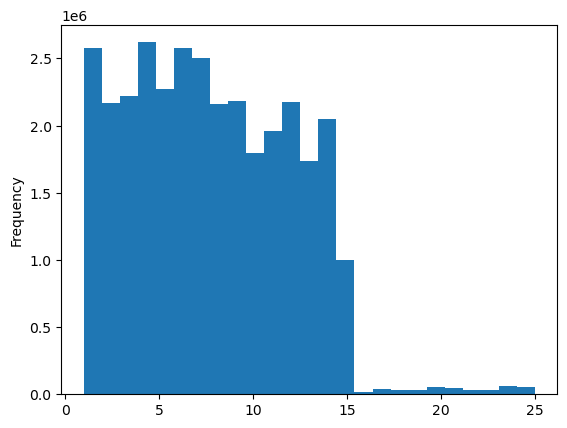

In [21]:
#Creating histogram after outliers are changed to null
hist = df['prices'].plot.hist(bins = 25)

In [22]:
#Most products are between $1 and $15, while a few are higher priced at $15 to $25. 

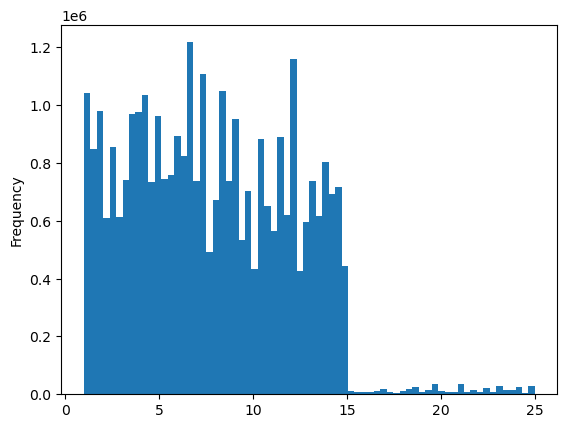

In [23]:
#More granularity increase the bins to 70
hist2 = df['prices'].plot.hist(bins = 70)

In [24]:
#Exporting histogram and saving image
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_prices.png'))

### Creating Samples to be used for line chart as dataset is too large and will require much computing power

In [25]:
#setting the seed
np.random.seed(4)

In [26]:
#Create a list holding True/False values to test np.random.rant() <= 0.7
dev = np.random.rand(len(df)) <= 0.7

In [27]:
#Store 70% sample in the data frame
big =df[dev]

In [28]:
#Store 30% of the sample in dataframe small
small = df[~dev]

In [29]:
# Check output - big+small -should have same number of rows
len(df)

32404859

In [30]:
len(big) + len(small)

32404859

In [31]:
#creating a dataframe using only the necessary columns
df_2 = small[['orders_days_of_week','prices']]

In [32]:
df_2.head()

,orders_days_of_week,prices
0,2,9.0
2,2,4.4
3,2,4.7
6,3,3.0
10,3,4.0


### Creating a Line Chart

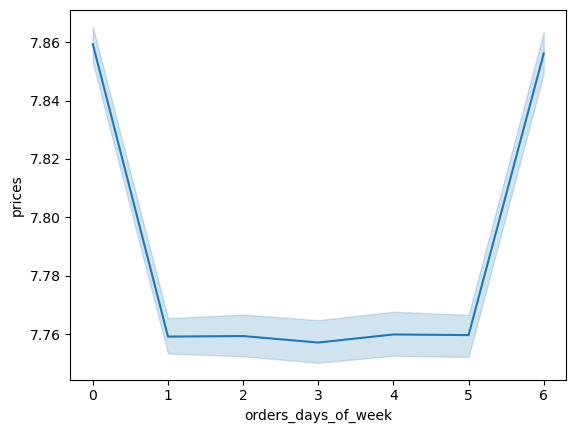

In [33]:
#Creating a line chart uding the df_2
line = sns.lineplot(data = df_2, x = 'orders_days_of_week',y = 'prices')

In [34]:
#The blue line, then, represents how prices differ depending on the day of the week.
#The peaks on days zero and six mean that most money is spent on Friday and Saturday. 
#This might be due to people stocking up on things before the weekend.
# Translucent blue bands around line are called error bands, and they represent the chart’s confidence intervals. 
#In other words, if this line were a prediction, there would be a 95 percent probability that the predicted value would fall within the area of the error bands.

In [35]:
#creating smaller subset of main dataframe using only relevant columns
df_4 = df[['orders_days_of_week', 'prices']]

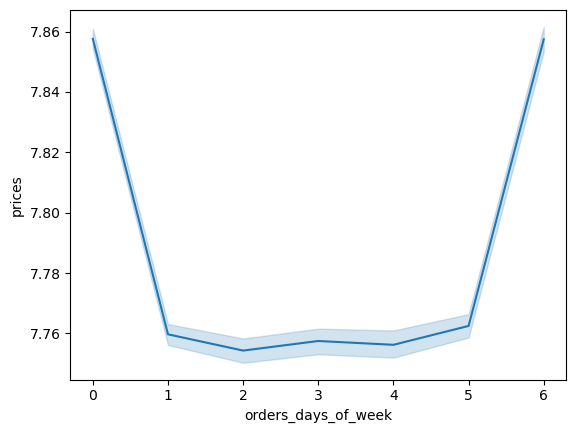

In [36]:
#Creating line chart from entire dataframe, to compare
line_2 = sns.lineplot(data = df_4, x = 'orders_days_of_week',y = 'prices')

In [37]:
#Exporting histogram and saving image
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_pricesbins25.png'))

In [39]:
#Exporting and saving image
line_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_prices_orders_days_week.png'))
